### Домашнее задание <a class="anchor" id="hw"></a><center>

**1. *Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.**

In [92]:
import numpy as np
import matplotlib.pyplot as plt

In [93]:
X = np.array([ [   1,    1,  500,    1],
               [   1,    1,  700,    1],
               [   1,    2,  750,    2],
               [   1,    5,  600,    1],
               [   1,    3, 1450,    2],
               [   1,    0,  800,    1],
               [   1,    5, 1500,    3],
               [   1,   10, 2000,    3],
               [   1,    1,  450,    1],
               [   1,    2, 1000,    2]], dtype = np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [94]:
X

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 5.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

In [95]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [96]:
def standard_scale(x):
    res = (x - x.mean()) / x.std()
    return res

In [97]:
X_st = X.copy()
X_st[:, 2] = standard_scale(X[:, 2])

In [98]:
X_st

array([[ 1.        ,  1.        , -0.97958969,  1.        ],
       [ 1.        ,  1.        , -0.56713087,  1.        ],
       [ 1.        ,  2.        , -0.46401617,  2.        ],
       [ 1.        ,  5.        , -0.77336028,  1.        ],
       [ 1.        ,  3.        ,  0.97958969,  2.        ],
       [ 1.        ,  0.        , -0.36090146,  1.        ],
       [ 1.        ,  5.        ,  1.08270439,  3.        ],
       [ 1.        , 10.        ,  2.11385144,  3.        ],
       [ 1.        ,  1.        , -1.08270439,  1.        ],
       [ 1.        ,  2.        ,  0.05155735,  2.        ]])

In [99]:
def calc_logloss(y, y_pred):
#     ИЗМЕНЕНИЯ
    err = 0
    for i in range(len(y)):
        if y_pred[i] == 0:
            err += (1.0 - y[i]) * np.log(1.0 - y_pred[i])
        elif y_pred[i] == 1:
            err += y[i] * np.log(y_pred[i])
        else:
#     ИЗМЕНЕНИЯ
            err += y[i] * np.log(y_pred[i]) + (1.0 - y[i]) * np.log(1.0 - y_pred[i])
    return - err / len(y)

In [100]:
# Пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([1, 0.1])
calc_logloss(y1, y_pred1)

0.05268025782891314

**2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.**

In [101]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [102]:
z = np.linspace(-10, 10, 101)

In [103]:
probabilities = sigmoid(z)

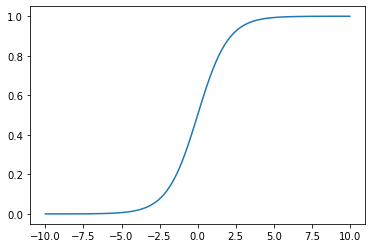

In [104]:
plt.plot(z, probabilities)
plt.show()

Logistic Regression

In [105]:
def eval_model(X, y, iterations, eta=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(iterations):
        z = np.dot(X, W)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        
        dQ = 1/n * X.T @ (y_pred - y)
        W -= eta * dQ
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [106]:
W = eval_model(X_st, y, iterations=500, eta=1e-4)

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
50 [ 0.494784   -0.14564801  0.6475462   1.52014828] 1.1657985749255424
100 [ 0.49290109 -0.15285535  0.64740132  1.51733474] 1.1531112685708473
150 [ 0.49102761 -0.16003088  0.64725118  1.51453281] 1.1405352753305023
200 [ 0.48916364 -0.16717404  0.64709581  1.51174267] 1.1280719326917483
250 [ 0.48730929 -0.17428428  0.64693524  1.50896452] 1.1157225565960736
300 [ 0.48546465 -0.18136107  0.64676951  1.50619853] 1.1034884426224387
350 [ 0.48362982 -0.18840385  0.64659868  1.5034449 ] 1.0913708674192037
400 [ 0.48180488 -0.19541206  0.64642281  1.50070383] 1.0793710903721336
450 [ 0.47998993 -0.20238516  0.64624195  1.49797551] 1.0674903554915993


In [126]:
#     ИЗМЕНЕНИЯ
W = eval_model(X_st, y, iterations=1000, eta=0.7)

0 [ 0.23114334 -1.15387749  0.62852225  1.12672747] 1.1785958344356262
100 [-1.87627864 -0.93823439  0.65163099  2.74038039] 0.3980530179257354
200 [-3.3281357  -0.95877696  0.08681842  3.64223885] 0.3512649365472245
300 [-4.44464661 -0.98697553 -0.33644618  4.3752513 ] 0.3229953608553544
400 [-5.34910982 -1.02205267 -0.66369283  5.00119844] 0.3040639586914672
500 [-6.11481094 -1.05954935 -0.93075861  5.55168405] 0.29026835657185235
600 [-6.78538079 -1.09746234 -1.15821864  6.04721313] 0.2795475397544976
700 [-7.38777723 -1.13497931 -1.35819009  6.50147674] 0.27080592461432307
800 [-7.939374   -1.17178431 -1.5381924   6.92381934] 0.2634168465872332
900 [-8.45181465 -1.2077711  -1.70312098  7.32078112] 0.25699878365394174


**3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).**

In [173]:
def calc_pred_proba(W, X):
    y_pred_proba = sigmoid(np.dot(X, W))
    return y_pred_proba

In [174]:
calc_pred_proba(W, X_st)

array([0.34057538, 0.19375933, 0.99210645, 0.00243942, 0.71373384,
       0.36222803, 0.99735005, 0.10020915, 0.38474107, 0.97971721])

**4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).**

In [175]:
def calc_pred(W, X):
    y_pred_proba = calc_pred_proba(W, X)
    y_pred = np.where(y_pred_proba > 0.7, 1, 0)
    return y_pred

In [176]:
pred = calc_pred(W, X_st)
pred

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1])

**5. *Реализуйте функции для подсчета Accuracy, матрицы ошибок, точности и полноты, а также F1 score.**

In [177]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [178]:
pred

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1])

**Accuracy**

In [179]:
def accuracy(y, y_pred):
    accuracy = np.mean(y == y_pred)
    return accuracy

In [180]:
accuracy(y, pred)

0.9

In [181]:
from sklearn.metrics import accuracy_score

In [182]:
accuracy_score(y, pred)

0.9

**Confusion Matrix**

In [183]:
def confusion_matrix(y, y_pred):
    cm = np.zeros((2, 2))
    for i in range(len(y)): 
        if y[i] == y_pred[i] ==  0: # TN
            cm[0][0] += 1
        elif y[i] == y_pred[i] == 1: # TP 
            cm[1][1] += 1
        elif y[i] != y_pred[i] and y[i] == 1:
            cm[1][0] += 1
        elif y[i] != y_pred[i] and y[i] == 1: # FN
            cm[0][1] += 1
    return cm

In [184]:
cm = confusion_matrix(y, pred)
cm

array([[5., 0.],
       [1., 4.]])

In [185]:
# TN FP
# FN TP 

In [186]:
from sklearn.metrics import confusion_matrix

In [187]:
confusion_matrix(y, pred)

array([[5, 0],
       [1, 4]])

**Precision**

In [192]:
def precision(y, y_pred):
    cm = confusion_matrix(y, y_pred)
    TN = cm[0][0]
    TP = cm[1][1]
    FP = cm[0][1]
    FN = cm[1][0]
    precision = TP / (TP + FP)
    return precision

In [193]:
precision(y, pred)

1.0

In [194]:
from sklearn.metrics import precision_score

In [195]:
precision_score(y, pred)

1.0

**Recall**

In [196]:
def recall(y, y_pred):
    cm = confusion_matrix(y, y_pred)
    TN = cm[0][0]
    TP = cm[1][1]
    FP = cm[0][1]
    FN = cm[1][0]
    recall = TP / (TP + FN)
    return recall

In [197]:
recall(y, pred)

0.8

In [198]:
from sklearn.metrics import recall_score

In [199]:
recall_score(y, pred)

0.8

**F-score**

In [200]:
def f_score(y, y_pred):
    pr = precision(y, y_pred)
    rec = recall(y, y_pred)
    f_score = 2 * pr * rec / (pr + rec)
    return f_score

In [201]:
f_score(y, pred)

0.888888888888889

In [202]:
from sklearn.metrics import f1_score

In [203]:
f1_score(y, pred)

0.888888888888889

**6. Могла ли модель переобучиться? Почему?**

Да, так как при значительном увеличении количества итераций, ошибка будет стремиться к нулю.